## Decision Tree Implementation

### Importing libraries

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
import numpy as np
import math

### Defining Entropy Function

In [2]:
def entropy(Y):
    ent_calc=0           #taking entropy as 0 initially
    classes = set(Y)       #taking all the distinct lables present in Y
    total_data = len(Y)    #taking length of target or say Y data
    
    for i in classes:
        #y_1 = y[i]
        y_1=np.count_nonzero(Y == i)     #counting occurence of 1 label in Y data
        P = y_1/total_data                 #calculating probability for the ith class by dividing it by total data of Y
        ent = - (P * math.log(P,2))        #calculating entropy using formula
        ent_calc += ent                    #adding it to total entropy
    return ent_calc                        #returning the calculated entropy

### Defining Information Gain Function

In [3]:
#to find informatin gain
def find_info_gain (X, Y, feature):        #passing X-data, Y-data, features
    
    y_entropy = entropy(Y)                 #calculating entropy of Y
    total_data = len(Y)                    #to get the count of labels present in Y data
    weighted_avg = 0                       #initiating the weighted average as = 0
    
    values = set(X[:, feature])            #fixing columns as features
    
    for i in values:                       #iterating over values while taking 1 feature at a time
        j = Y[X[:, feature] == i]          #taking the i-th feature
        i_ent = entropy(j)                 #calculating entropy of Y when feature is i-th
        
        weighted_avg += (i_ent*len(j))/total_data     #calculating weighted average for i-th feature
        
    info_gain = y_entropy - weighted_avg #finding final info gain
    return info_gain                     #returning the value of the calculated info gain
    

### Defining Split Info function

In [4]:
#finding split info, these two will help us in calculating the gain ratio
def find_split_info (X, Y, feature):
    total_data = len (Y)                #taking count of all the labels present in Y data
    weighted_avg = 0                     #initiating weighted average as 0
    values = set(X[:, feature])    #fixing columns here with features
    
    for i in values:                    #taking 1 feature at a time
        
        j = Y[(X[:, feature])== i]      #taking values of Y for the i-th feature
        weighted_avg += ((len(j) / total_data) * np.log2((len(j) / total_data)))      #calculating the weighted average
        
    return -1*weighted_avg              #returning the negative of weighted_avg

### Best feature and Maximum Gain Function

In [5]:
#finding best feature and maximum gain:
def find_best_feature(X,Y, features):
    best_feature = -1                   #initiating best feature as -1
    max_gain = -1                       #initiating max_gain as -1
    
    for current_feature in features:    #traversing all features
        #finding split info and info gain
        split_info = find_split_info(X, Y, current_feature)
        info_gain = find_info_gain(X, Y, current_feature)
        
        #finding gain ratio
        if(split_info != 0):
            gain_ratio = info_gain/split_info
        else:
            gain_ratio = -1
            
        #getting best feature and best gain ratio:
        if(gain_ratio > max_gain):
            best_feature= current_feature
            max_gain = gain_ratio
            
    return (best_feature, max_gain)     #returning best feature and maximum gain

### Defining function for Decision Tree

In [6]:
def D_T(X, Y, features, level):     #this function is base function for Decision Tree
    classes = set(Y)                #take all the unique labels present in Y
    
    #now we will go through all the cases and find out whether we can split our tree or not and whether the node is leaf or not
    
    #case 1:
    if (len(classes) == 1):         #see if the length of classes is 1 or not
        
        print("Level", level)       #now we will print the current level as we don't have further classes, we've reached the leaf node
        current_class = list(classes)[0]                 #current class will be our class at 0th position (although length is 1, we are doing this to select the class)
        
        print("Count of ", current_class, " = ", len(Y))  #now we are printing the class and its count
        print("Current Entropy is = 0.0")                #Entropy is 0 since class will be 0 and hence no randomness
        print("Reached leaf Node")                       #we only have 1 class so we are at leaf node
        print()
        return
    
    #case 2:
    elif len(features) == 0:        #checking if the count of features is 0 or not
        print("Level ", level)       #if feature is 0 that means we can't split further so we are just printing out the level
        
        #finding count of each output class
        for current_class in classes:
            count_of_current_class = (Y == current_class).sum()
            print("Count of", current_class, "=", count_of_current_class)
            
        #printing as we did in above case
        entropy_current = entropy(Y)
        
        print("Current Entropy is = ", entropy_current)
        print("No more features left")
        print("Reached leaf Node")
        print()
        return
    
    #case 3:
    elif((find_best_feature(X, Y, features))[0] == -1):   # this case might not be necessary but we are taking it to avoid errors so we are checking if best_feature is -1 as you can see in best_feature function it states that there is no feature as the value is still -1
        print("Level", level)                            #printing current level as we can not split further
        
        #get count of each output class
        for i in classes:
            j = (Y == i).sum()
            print("Count of ", i, " = ", j)
        
        #finding class with majority and its entropy
        
        entropy_current = entropy(Y)
        
        print("Current entropy is = ", entropy_current)
        print("No more features left")
        print("Reached leaf node")
        print()
        return
    
    #case 4: when we don't have a leaf node and feature count is not 0 and count of classes is not 1
    else:
        print("Level", level)                           #printing the current level
        
        for i in classes:                               #iterating over that is labels in Y
            j = (Y == i).sum()                          #taking sum of all the i-th label in Y data that is calculating its count (in Y)
            print("Count of ", i, " = ", j)             #printing the class and its count
            
        #entropy of Current Node
        print("Current Entropy is ", entropy(Y))
        
        #getting best feature to split and its gain ratio
        best_feature, gain_ratio = find_best_feature(X, Y, features)
        print("Splitting on feature ", best_feature, " with gain ratio: ", gain_ratio)
        print()
        
        #splitting current node on all different values that the best feature can have and recursively calling DT on each split
        diff_val_of_best_feat = set(X[:, best_feature]) #get different values of the best_feature in current data
        
        #traverse each feature value, split on each
        for current in diff_val_of_best_feat:
            
            x = X[(X[:, best_feature] == current)]
            y = Y[(X[:, best_feature] == current)]
            position_of_best_feat = np.where(features == best_feature)
            remaining_features = np.delete(features, position_of_best_feat)     #we are additionally deleting features when a split has been called on it
            
            #using recursion
            D_T(x, y, remaining_features, level+1)
        return
    
    
    

### Loading data and converting continuous values into discrete values

In [7]:
# loading our dataset using sklearn 
from sklearn import datasets     
iris = datasets.load_iris()
x = iris.data            # taking x data in it 
y = iris.target          # taking target labels or y data in it 

# To convert values of features into discrete values. We have continuous values so we are converting our data into discrete values using simple maths 
def cont_to_discrete(feature):
    second = feature.mean()        # mean of the value under the particular feature column  
    first = second * 0.5           # taking 0.5 of the mean to create sections 
    third = second * 1.5           # similarly taking 1.5 of the mean to create sections to make our values discrete 
    
    # now assigning the discrete values to our data according to first , second and third 
    for i in range(len(feature)):
        if(feature[i] < first):
            feature[i] = 0
        elif(feature[i] < second):
            feature[i] = 1
        elif(feature[i] < third):
            feature[i] = 2
        else:
            feature[i] = 3
    return feature

# Applying the function to all features
for i in range(x.shape[1]):
    cont_to_discrete(x[:,i])

# now we have all the features in discrete form and arranged properly     
features = np.array([i for i in range(x.shape[1])])

### Calling decision tree

In [8]:
#now we are calling our decision tree on the Iris data
D_T(x, y, features, 0)           #initializing level with 0 

Level 0
Count of  0  =  50
Count of  1  =  50
Count of  2  =  50
Current Entropy is  1.584962500721156
Splitting on feature  3  with gain ratio:  0.7350016280496154

Level 1
Count of  0  =  49
Current Entropy is = 0.0
Reached leaf Node

Level 1
Count of  0  =  1
Count of  1  =  10
Current Entropy is  0.4394969869215134
Splitting on feature  1  with gain ratio:  1.0

Level 2
Count of  1  =  10
Current Entropy is = 0.0
Reached leaf Node

Level 2
Count of  0  =  1
Current Entropy is = 0.0
Reached leaf Node

Level 1
Count of  1  =  39
Count of  2  =  5
Current Entropy is  0.5107878229540133
Splitting on feature  2  with gain ratio:  0.2488471906913508

Level 2
Count of  1  =  1
Current Entropy is = 0.0
Reached leaf Node

Level 2
Count of  1  =  38
Count of  2  =  4
Current Entropy is  0.4537163391869448
Splitting on feature  1  with gain ratio:  0.04070432026142338

Level 3
Count of  1  =  31
Count of  2  =  4
Current Entropy is  0.512709142030877
Splitting on feature  0  with gain ratio: 

In [9]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


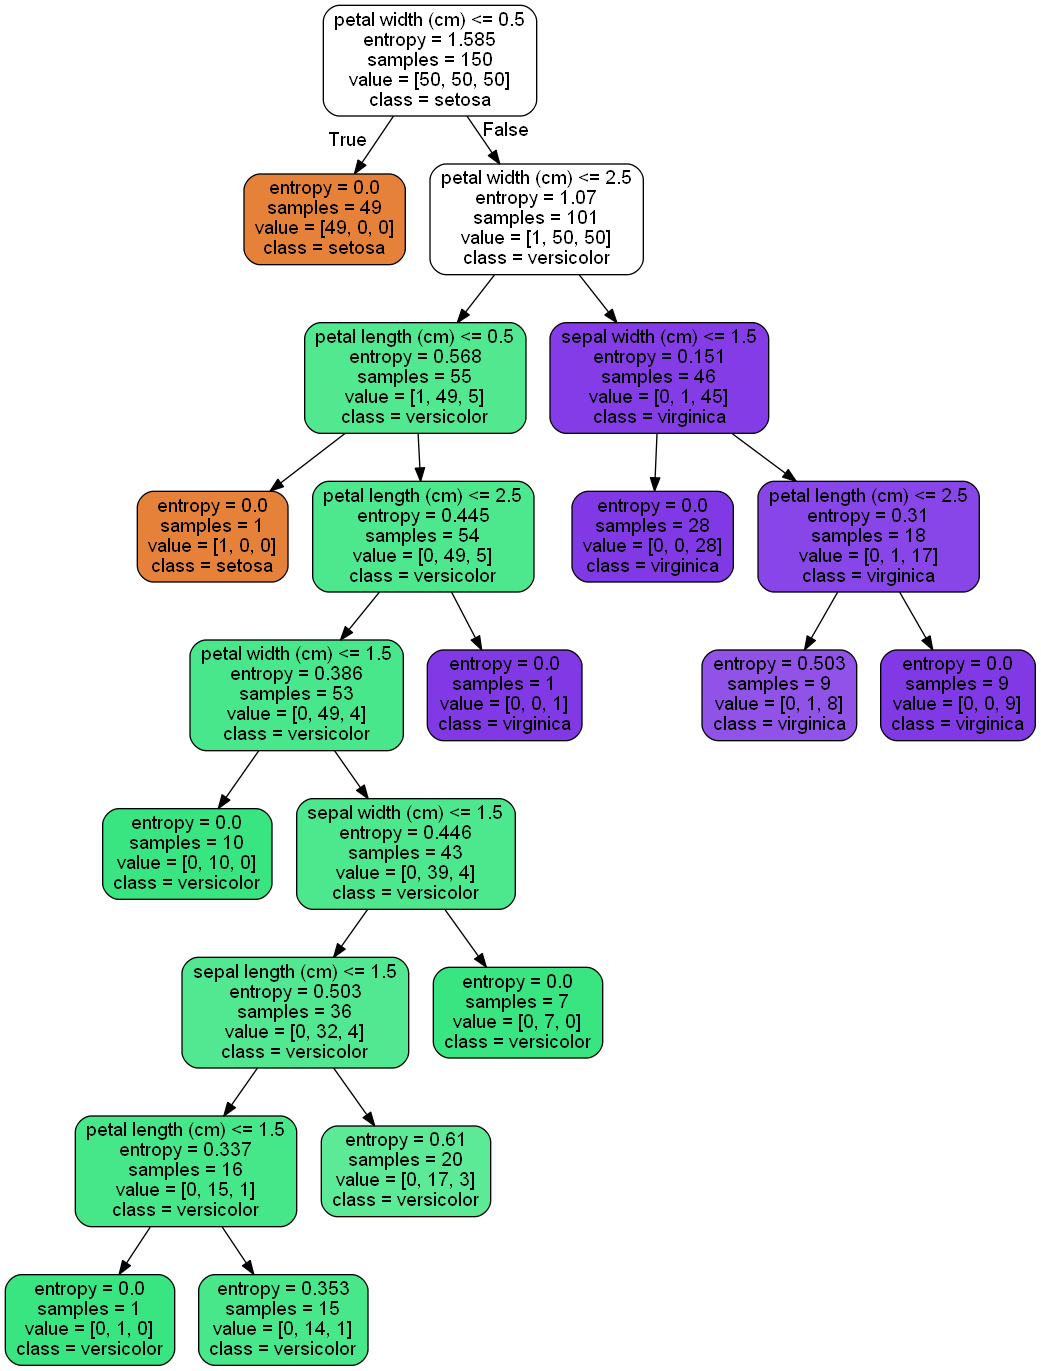

In [10]:
#printing the decision tree formed using pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, feature_names = iris.feature_names, class_names= iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())